In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
panda = [100, 5, 20, 80]

In [9]:
panda_np = np.array(panda)

In [10]:
panda_np

array([100,   5,  20,  80])

In [11]:
panda_np / 2

array([50. ,  2.5, 10. , 40. ])

In [12]:
famille_panda = [

    np.array([100, 5  , 20, 80]), # maman panda

    np.array([50 , 2.5, 10, 40]), # bébé panda

    np.array([110, 6  , 22, 80]), # papa panda

]

In [13]:
familly_np = np.array(famille_panda)

In [14]:
familly_np

array([[100. ,   5. ,  20. ,  80. ],
       [ 50. ,   2.5,  10. ,  40. ],
       [110. ,   6. ,  22. ,  80. ]])

In [15]:
familly_np[2,0]

110.0

In [16]:
familly_df = pd.DataFrame(familly_np, index = ['maman', 'bebe','papa'], columns = ['pattes', 'poil', 'queue', 'ventre'])

In [17]:
familly_df

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0


In [18]:
dep = pd.read_csv("cur_dep.csv", sep=";")

In [19]:
dep.iloc[0]

id                                                                        1
nom                                                          Cédric Roussel
nom_de_famille                                                      Roussel
prenom                                                               Cédric
sexe                                                                      H
date_naissance                                                   1972-10-10
lieu_naissance                                            Brest (Finistère)
num_deptmt                                                               06
nom_circo                                                   Alpes-Maritimes
num_circo                                                                 3
mandat_debut                                                     2017-06-21
mandat_fin                                                              NaN
ancien_depute                                                             0
groupe_sigle

In [20]:
dep

,id,nom,nom_de_famille,prenom,sexe,date_naissance,lieu_naissance,num_deptmt,nom_circo,num_circo,...,anciens_mandats,profession,place_en_hemicycle,url_an,id_an,slug,url_nosdeputes,url_nosdeputes_api,nb_mandats,twitter
0,1,Cédric Roussel,Roussel,Cédric,H,1972-10-10,Brest (Finistère),06,Alpes-Maritimes,3,...,21/06/2017 / /,Conseiller en gestion de patrimoine indépendant,309,http://www2.assemblee-nationale.fr/deputes/fic...,718902,cedric-roussel,https://www.nosdeputes.fr/cedric-roussel,https://www.nosdeputes.fr/cedric-roussel/csv,1,CedricRoussel06
1,2,Nadia Hai,Hai,Nadia,F,1980-03-08,Trappes (Yvelines),78,Yvelines,11,...,21/06/2017 / /,Autre cadre (secteur privé),343,http://www2.assemblee-nationale.fr/deputes/fic...,722054,nadia-hai,https://www.nosdeputes.fr/nadia-hai,https://www.nosdeputes.fr/nadia-hai/csv,1,NadiaHai78
2,3,Pascale Fontenel-Personne,Fontenel-Personne,Pascale,F,1962-05-26,Mans (Sarthe),72,Sarthe,3,...,21/06/2017 / /,Industriel-Chef d'entreprise,463,http://www2.assemblee-nationale.fr/deputes/fic...,721384,pascale-fontenel-personne,https://www.nosdeputes.fr/pascale-fontenel-per...,https://www.nosdeputes.fr/pascale-fontenel-per...,1,f_personne
3,4,Laurent Pietraszewski,Pietraszewski,Laurent,H,1966-11-19,Saint-Denis (Seine-Saint-Denis),59,Nord,11,...,21/06/2017 / /,Autre cadre (secteur privé),371,http://www2.assemblee-nationale.fr/deputes/fic...,720512,laurent-pietraszewski,https://www.nosdeputes.fr/laurent-pietraszewski,https://www.nosdeputes.fr/laurent-pietraszewsk...,1,pietraszewski_l
4,5,Guillaume Kasbarian,Kasbarian,Guillaume,H,1987-02-28,Marseille (Bouches-du-Rhône),28,Eure-et-Loir,1,...,21/06/2017 / /,Cadre supérieur (secteur privé),458,http://www2.assemblee-nationale.fr/deputes/fic...,719372,guillaume-kasbarian,https://www.nosdeputes.fr/guillaume-kasbarian,https://www.nosdeputes.fr/guillaume-kasbarian/csv,1,guillaumekasba
5,6,Cyrille Isaac-Sibille,Isaac-Sibille,Cyrille,H,1958-04-30,Lyon 6 (Rhône),69,Rhône,12,...,21/06/2017 / /,Médecin,184,http://www2.assemblee-nationale.fr/deputes/fic...,722374,cyrille-isaac-sibille,https://www.nosdeputes.fr/cyrille-isaac-sibille,https://www.nosdeputes.fr/cyrille-isaac-sibill...,1,Cisaacsibille
6,7,Guillaume Vuilletet,Vuilletet,Guillaume,H,1967-06-20,Beauvais (Oise),95,Val-d'Oise,2,...,21/06/2017 / /,Cadre supérieur (secteur privé),373,http://www2.assemblee-nationale.fr/deputes/fic...,721262,guillaume-vuilletet,https://www.nosdeputes.fr/guillaume-vuilletet,https://www.nosdeputes.fr/guillaume-vuilletet/csv,1,g_vuilletet
7,8,Olivier Faure,Faure,Olivier,H,1968-08-18,La Tronche (Isère),77,Seine-et-Marne,11,...,20/06/2012 / 20/06/2017 / fin de législature|2...,Cadre supérieur (secteur privé),503,http://www2.assemblee-nationale.fr/deputes/fic...,609332,olivier-faure,https://www.nosdeputes.fr/olivier-faure,https://www.nosdeputes.fr/olivier-faure/csv,1,faureolivier
8,9,Pierre-Alain Raphan,Raphan,Pierre-Alain,H,1983-04-06,Choisy-le-Roi (Val-de-Marne),91,Essonne,10,...,21/06/2017 / /,Directeur d'un cabinet de conseil,269,http://www2.assemblee-nationale.fr/deputes/fic...,721888,pierre-alain-raphan,https://www.nosdeputes.fr/pierre-alain-raphan,https://www.nosdeputes.fr/pierre-alain-raphan/csv,1,p_a_raphan
9,11,Emmanuelle Anthoine,Anthoine,Emmanuelle,F,1964-07-02,Saint-Vallier (Drôme),26,Drôme,4,...,21/06/2017 / /,Avocate,63,http://www2.assemblee-nationale.fr/deputes/fic...,719318,emmanuelle-anthoine,https://www.nosdeputes.fr/emmanuelle-anthoine,https://www.nosdeputes.fr/emmanuelle-anthoine/csv,1,eanthoine26


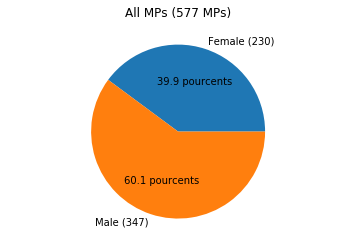

In [37]:
class SetOfParlementMember:
    def __init__(self, name):
        self.name = name
    def data_from_csv(self, csv_file):
        self.dataframe = pd.read_csv(csv_file, sep=";")
    def data_from_dataframe(self, dataframe):
        self.dataframe = dataframe
    def display_char(self):
        data = self.dataframe
        female_mps = data[data.sexe == "F"]
        male_mps = data[data.sexe == "H"]

        counts = [len(female_mps), len(male_mps)]
        counts = np.array(counts)
        nb_mps = counts.sum()
        proportions = counts / nb_mps

        labels = ["Female ({})".format(counts[0]), "Male ({})".format(counts[1])]

        fig, ax = plt.subplots()
        ax.axis("equal")
        ax.pie(
                proportions,
                labels=labels,
                autopct="%1.1f pourcents"
                )
        plt.title("{} ({} MPs)".format(self.name, nb_mps))
        plt.show()
    def split_by_party(self):
        result = {}
        data = self.dataframe
        all_party = data["parti_ratt_financier"].dropna().unique()
        for part in all_party:
            data_subset = data[data.parti_ratt_financier == part]
            subset = SetOfParlementMember('MPs from party "{}"'.format(part))
            subset.data_from_dataframe(data_subset)
            resutl[part] = subset
        return (result)
    def total_mps(self):
        return len(self.dataframe)

def launch_analysis(data_file, by_party = False):
    sopm = SetOfParlementMember("All MPs")
    sopm.data_from_csv(data_file)
    sopm.display_char()
    
    if by_party:
        for party, s in sopm.split_by_party().items():
            s.display_char()
            

if __name__ == "__main__":
    launch_analysis('cur_dep.csv')

In [38]:
type(dep)

pandas.core.frame.DataFrame

In [39]:
sopm = SetOfParlementMember("All MPs")
sopm.data_from_csv('cur_dep.csv')

In [40]:
print(sopm.total_mps())

577


In [41]:
class hack:
    def __len__(self):
        print("Yeah man")
        return (5)
a = hack()

In [42]:
print(len(a))

Yeah man
5


In [43]:
sopm.total_mps()

577

In [46]:
class babar:
    def __repr__(self):
        return ("je suis un elephant")
a = babar()

In [47]:
print(a)

je suis un elephant


In [1]:
range(4)

range(0, 4)